In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [17]:
image = mpimg.imread("test.jpg")

In [18]:
image.shape

(720, 1280, 3)

In [19]:
xsize = image.shape[1]
ysize = image.shape[0]

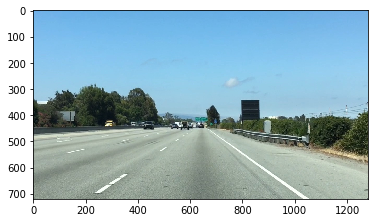

In [20]:
plt.imshow(image)
plt.show()

In [21]:
# Get copies of the original image
color_select = np.copy(image)
line_image = np.copy(image)

In [22]:
red_threshold = 0
green_threshold = 0
blue_threshold = 0

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [23]:
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

fit_left = np.polyfit((left_bottom[0],apex[0]), (left_bottom[1],apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

print(fit_left)
print(fit_right)
print(fit_bottom)

[ -1.3475 539.    ]
[   0.6 -240. ]
[-2.65555556e-01  5.39000000e+02]


In [24]:
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [25]:
color_select[color_thresholds] = [0, 0, 0]

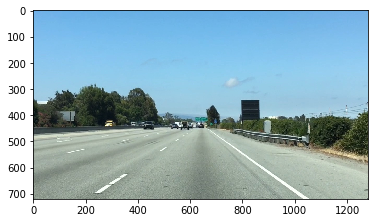

In [26]:
plt.imshow(color_select)
plt.show()

In [27]:
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

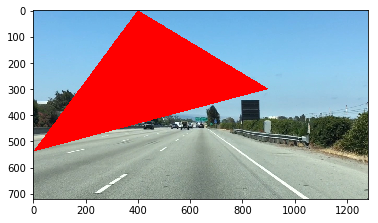

In [28]:
plt.imshow(line_image)
plt.show()